In [ ]:
# Get stock data from yahoo finance

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

stockFileName = 'stockData.csv'

def getStockData():
    tickers = []

    tickers.append('AMZN')

    # indexs
    tickers.extend(['^DJI', '^GSPC', '^NDX'])

    # Treasury Yield
    #tickers.extend(['^IRX', '^FVX', '^TNX', '^TYX'])

    # other countries index
    #tickers.extend(['000001.SS', '^HSI', '^N225', '^FCHI', '^GDAXI',  '^BSESN'])

    # other companies
    tickers.extend(['AAPL', 'FB', 'GOOG', 'NFLX', 'EBAY', 'CRM', 'MSFT', 'WMT'])

    start_date = '2014-1-1'
    end_date = '2018-12-31'

    frames = []
    for ticker in tickers:
        stock_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
        stock_data = stock_data.rename(lambda s: (s.lower() + '-' + ticker).replace(' ', '-'), axis='columns')
        frames.append(stock_data)

    df_final = reduce(lambda left,right: left.join(right), frames)

    df_final.to_csv(stockFileName)
    
getStockData()

In [3]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv(stockFileName)

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)

add_datepart = True

import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    if drop: df.drop(fldname, axis=1, inplace=True)

# Add year, month, week, day & date related information
if add_datepart:
    add_datepart(data, 'Date')
else:
    data.drop('Data', axis=1, inplace=True)
        
train_len = int(len(data) * 0.85)

dropColumns = ['high-AMZN', 'low-AMZN', 'open-AMZN', 'close-AMZN']
for column in dropColumns:
    print (column)
    data = data.drop(column, axis=1)


high-AMZN
low-AMZN
open-AMZN
close-AMZN


In [4]:
data.shape

(1258, 80)

In [5]:
data.head()

,volume-AMZN,adj-close-AMZN,high-^DJI,low-^DJI,open-^DJI,close-^DJI,volume-^DJI,adj-close-^DJI,high-^GSPC,low-^GSPC,...,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,2137800,397.970001,16573.070312,16416.490234,16572.169922,16441.349609,80960000,16441.349609,1845.859985,1827.739990,...,1,2,3,2,False,False,False,False,False,False
2014-01-03,2210200,396.440002,16518.740234,16439.300781,16456.890625,16469.990234,72770000,16469.990234,1838.239990,1829.130005,...,1,3,4,3,False,False,False,False,False,False
2014-01-06,3170600,393.630005,16532.990234,16405.519531,16474.039062,16425.099609,89380000,16425.099609,1837.160034,1823.729980,...,2,6,0,6,False,False,False,False,False,False
2014-01-07,1916000,398.029999,16562.320312,16429.019531,16429.019531,16530.939453,81270000,16530.939453,1840.099976,1828.709961,...,2,7,1,7,False,False,False,False,False,False
2014-01-08,2316500,401.920013,16528.880859,16416.689453,16527.660156,16462.740234,103260000,16462.740234,1840.020020,1831.400024,...,2,8,2,8,False,False,False,False,False,False


In [6]:
train = data[:train_len]
valid = data[train_len:]

x_train = train.drop('adj-close-AMZN', axis=1)
y_train = train['adj-close-AMZN']
x_valid = valid.drop('adj-close-AMZN', axis=1)
y_valid = valid['adj-close-AMZN']

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

/Users/yanjingding/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/yanjingding/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score

model = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)



In [8]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.045899,0.098295,0.096966,0.106967,0.095034,0.051826,0.095034,0.080630,0.080660,0.090831,...,0.000000,0.033333,0.75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.049079,0.093417,0.099022,0.096684,0.097581,0.041374,0.097581,0.073808,0.081908,0.079570,...,0.000000,0.066667,1.00,0.002755,0.0,0.0,0.0,0.0,0.0,0.0
2,0.091271,0.094697,0.095977,0.098214,0.093588,0.062571,0.093588,0.072842,0.077059,0.078769,...,0.019231,0.166667,0.00,0.011019,0.0,0.0,0.0,0.0,0.0,0.0
3,0.036155,0.097330,0.098095,0.094198,0.103001,0.052221,0.103001,0.075473,0.081531,0.075565,...,0.019231,0.200000,0.25,0.013774,0.0,0.0,0.0,0.0,0.0,0.0
4,0.053749,0.094328,0.096984,0.102997,0.096936,0.080284,0.096936,0.075402,0.083947,0.083745,...,0.019231,0.233333,0.50,0.016529,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

916.6979001994159

/Users/yanjingding/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/yanjingding/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


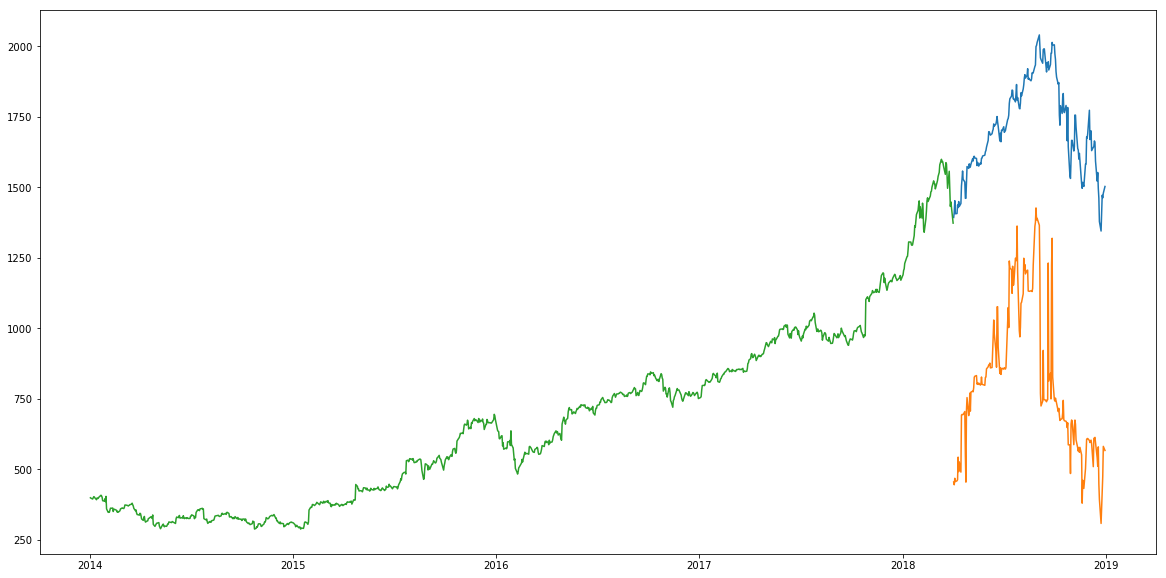

In [11]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['adj-close-AMZN', 'Predictions']])
plt.plot(train['adj-close-AMZN'])